In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import normalize
from joblib import load

In [2]:
X_scaled, X = load('../../analysis and preprocessing/clustering_preprocessed.joblib')

In [3]:
X_norm = normalize(X_scaled)
X_norm_df = pd.DataFrame(X_norm)

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=['pca0', 'pca1'])

### Biramo najbolji model

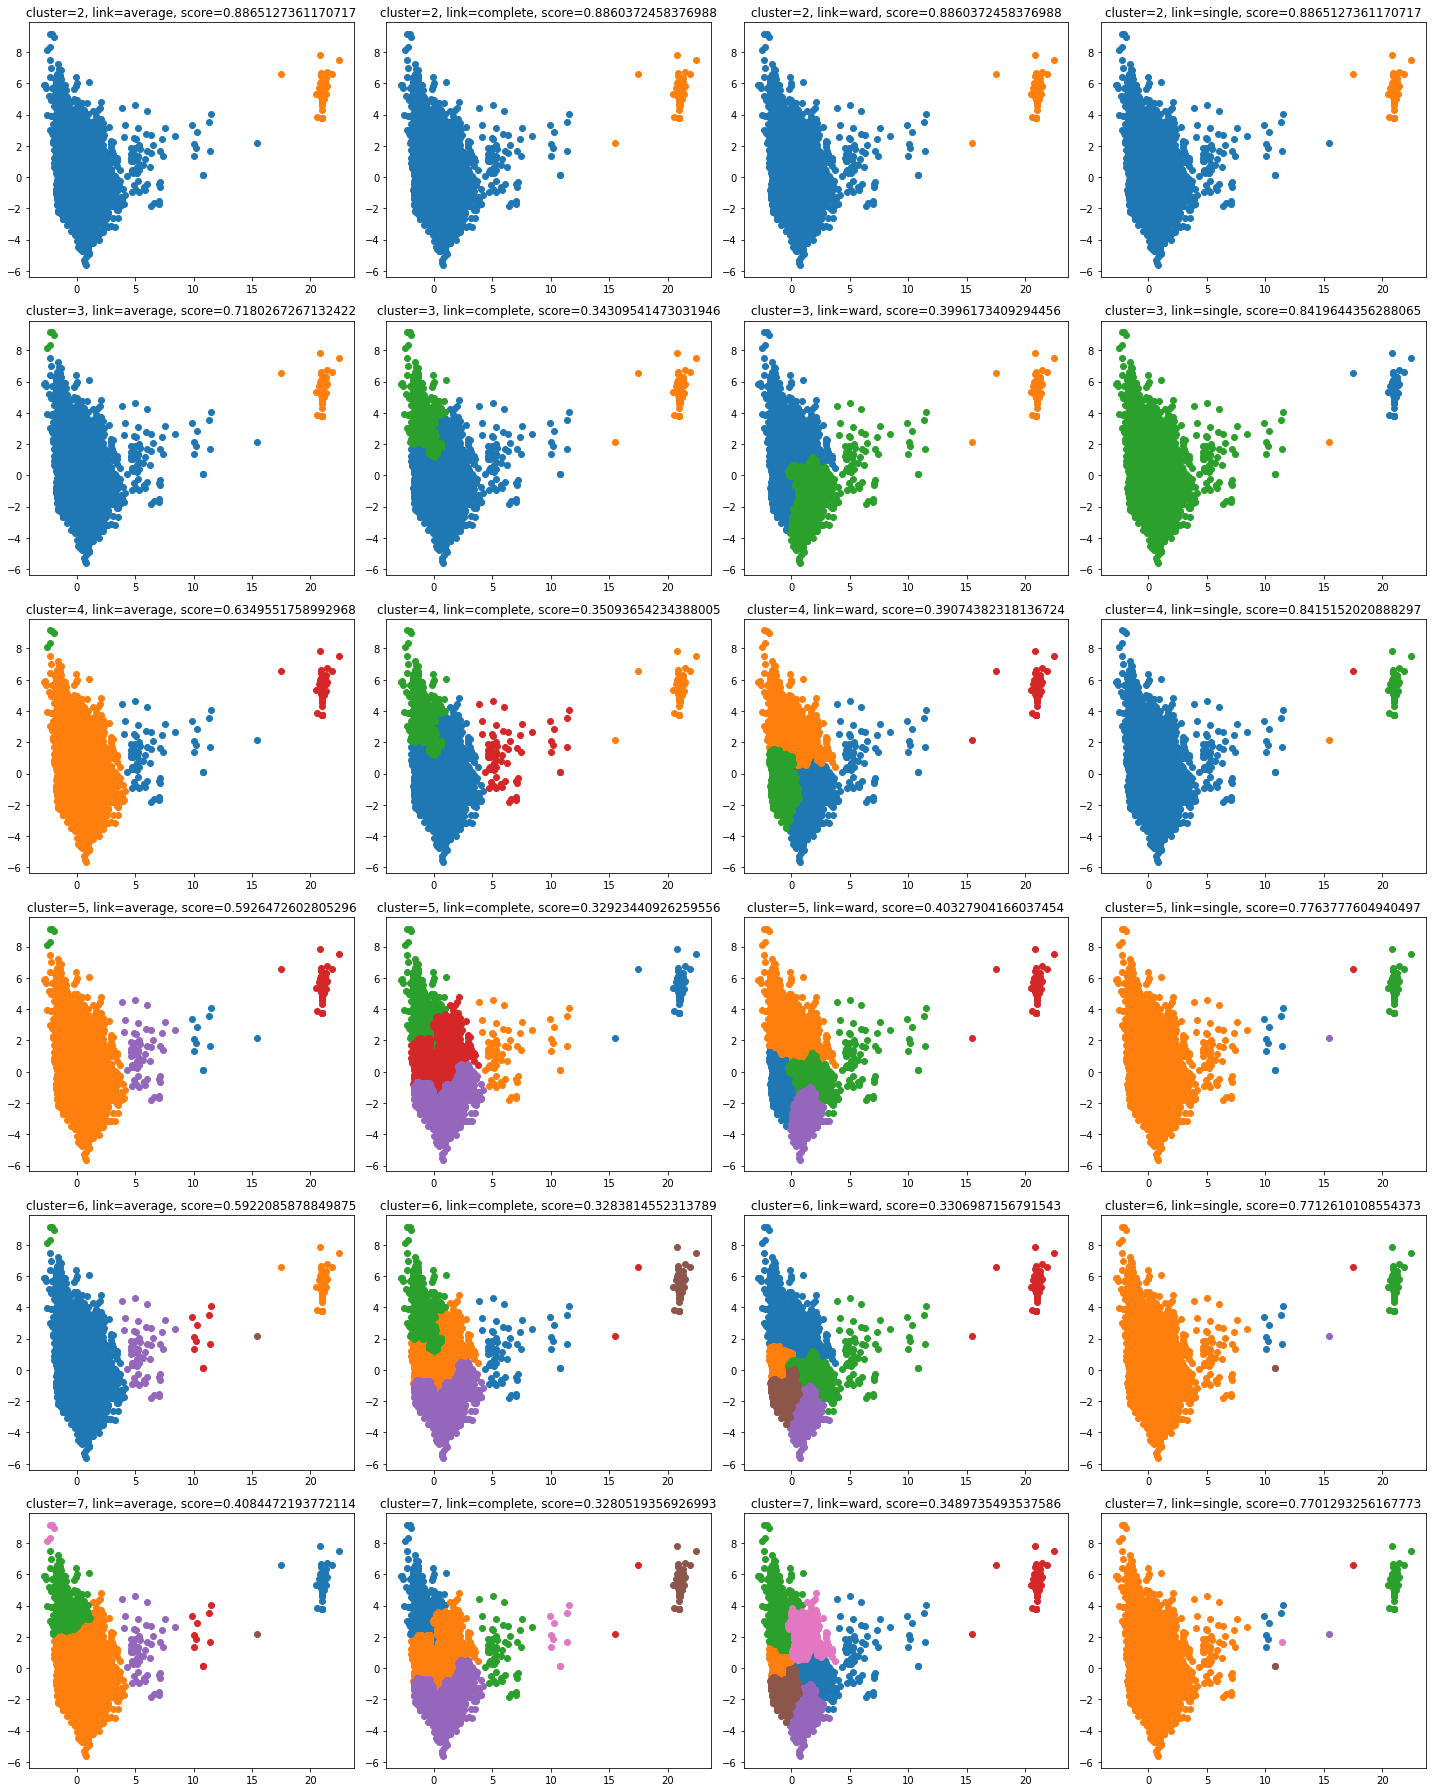

In [5]:
linkages = ['average', 'complete', 'ward', 'single']
cluster_range = range(2,8)
silhouettes = []
i = 1
best_model = None
max_score = float('-inf')
fig = plt.figure(figsize=(20,25))

for cluster_num in cluster_range:
    for l in linkages:
        model = AgglomerativeClustering(n_clusters=cluster_num, linkage=l)
        model.fit(X_pca_df)
           
        score = silhouette_score(X_pca_df, model.labels_)
        
        fig.add_subplot(len(cluster_range), len(linkages), i)
        i += 1
        
        for cluster_label in range(cluster_num):
            cluster = X_pca_df[cluster_label == model.labels_]
            plt.scatter(cluster['pca0'], cluster['pca1'], label=f'cluster {cluster_label}')
            
        plt.title(f'cluster={cluster_num}, link={l}, score={score}')
        if score > max_score:
            max_score = score
            best_model = model
            
        if best_model.linkage == l:
            silhouettes.append(silhouette_score(X_pca_df, model.labels_))


plt.tight_layout()
plt.show()

In [6]:
best_model.n_clusters_

2

In [7]:
max_score

0.8865127361170717

In [8]:
best_model.linkage

'average'

### Prikazujemo izdvojen najbolji model

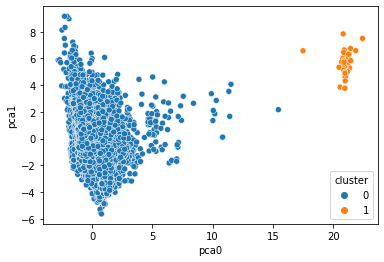

In [9]:
X_pca_df['cluster'] = pd.Categorical(best_model.labels_)
sns.scatterplot(x = "pca0", y = "pca1", hue = "cluster", data = X_pca_df)
plt.show()

In [10]:
silhouettes

[0.8865127361170717,
 0.7180267267132422,
 0.6349551758992968,
 0.5926472602805296,
 0.5922085878849875,
 0.4084472193772114]

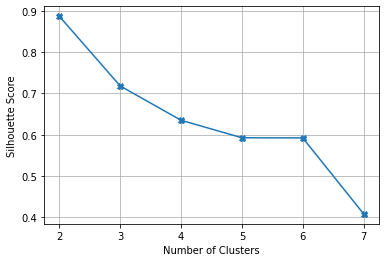

In [11]:
plt.plot(cluster_range, silhouettes, marker='X')
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Prikazujemo dendogram

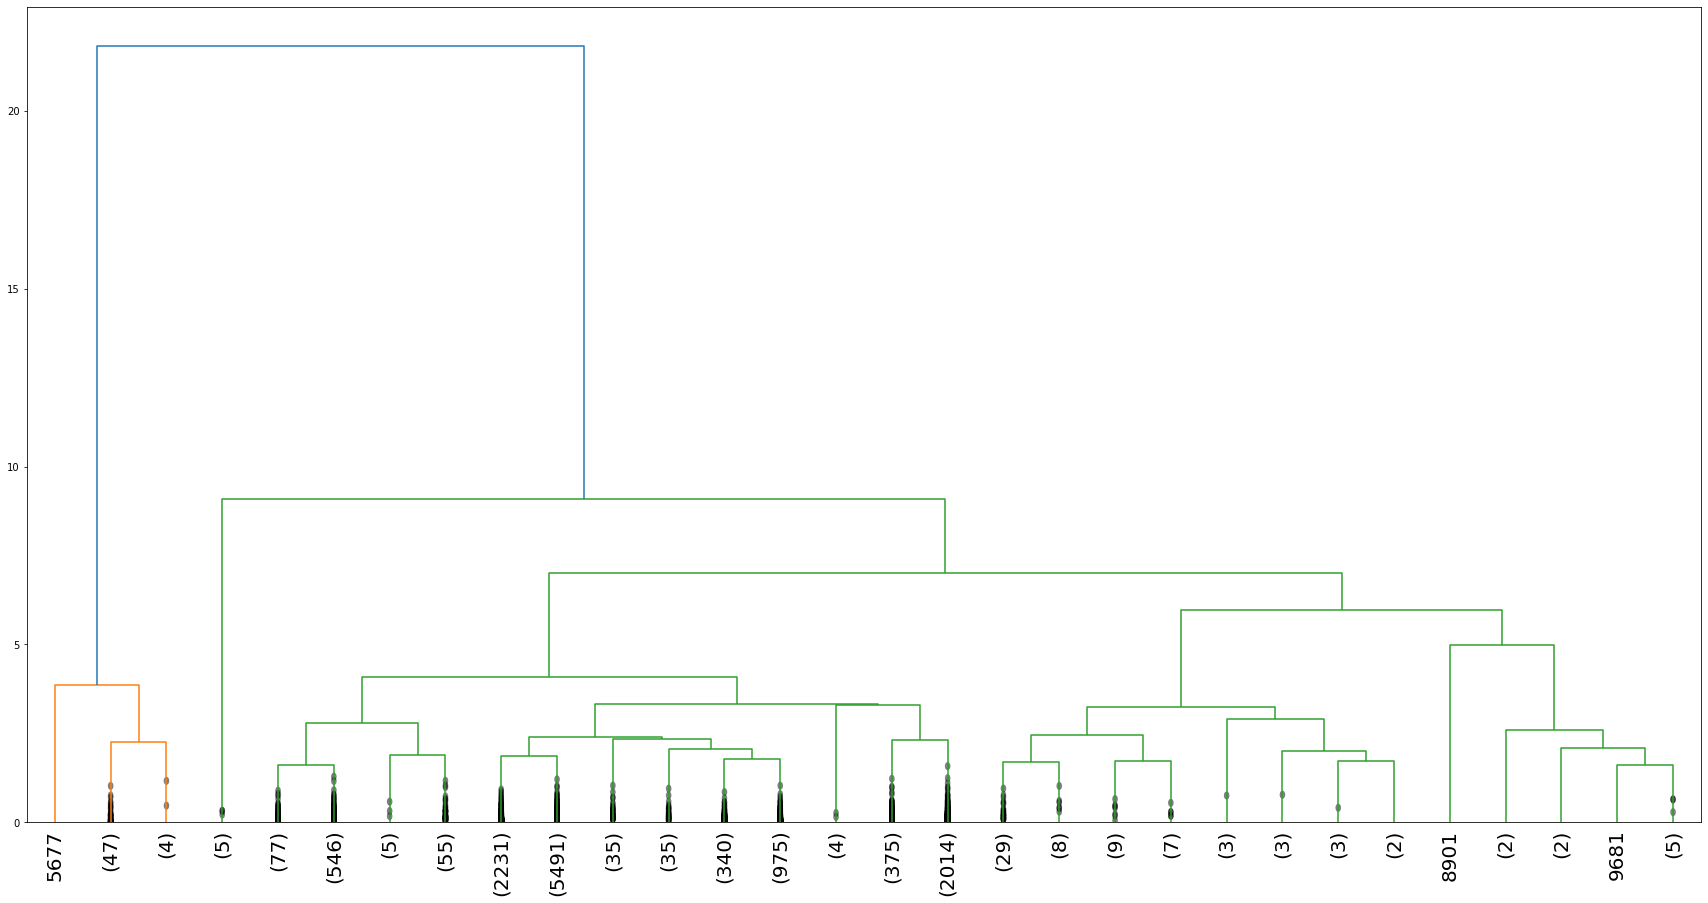

In [12]:
plt.figure(figsize=(30,15))

dendrogram(
    linkage(X_pca_df, method=best_model.linkage),
    truncate_mode='lastp',   
    labels=X_pca_df.index,
    leaf_rotation=90.,
    leaf_font_size=20,
    show_contracted=True, 
)

plt.show()